**California housing Dataset**

There are 20,640 samples and 8 features variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [1]:
import numpy as np
import pandas as pd
import sys


#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt



#To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
#imports from sklearn library

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
#loading the dataset direclty from sklearn
from sklearn.datasets import fetch_california_housing

In [4]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


As written in the description, the dataset contains aggregated data regarding each district in California. Let’s have a close look at the features that can be used by a predictive model.

In [6]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

Now, let’s have a look to the target to be predicted.

In [7]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains the median of the house value for each district. Therefore, this problem is a regression problem.

We can now check more into details the data types and if the dataset contains any missing value.

In [8]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Exploratory Data Analysis**


Exploratory Data Analysis is a very important step before training the model. Here, we will use visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable. We will use the histogram plot function from the matplotlib library.

We can see that:

*   the dataset contains 20,640 samples and 8 features;
*   all features are numerical features encoded as floating number;
*   there is no missing values.

Let’s have a quick look at the distribution of these features by plotting their histograms.

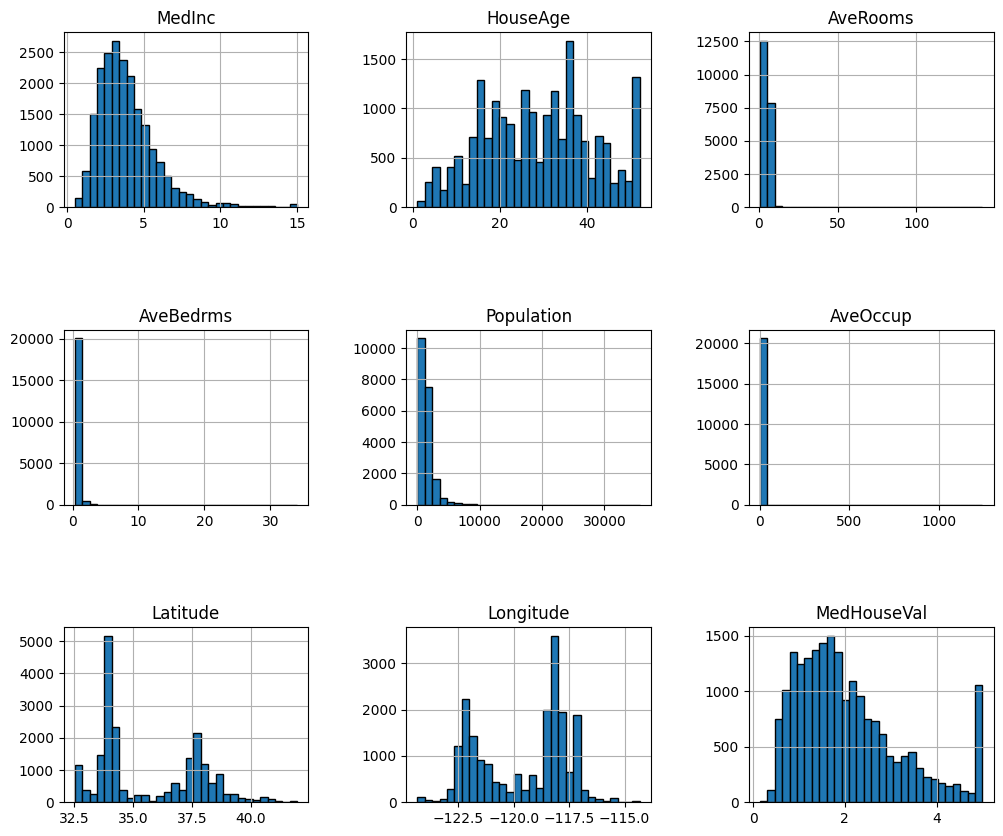

In [9]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [10]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these features, comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values.

Up to know, we discarded the longitude and latitude that carry geographical information. In short, the combination of this feature could help us to decide if there are locations associated with high-valued houses. Indeed, we could make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

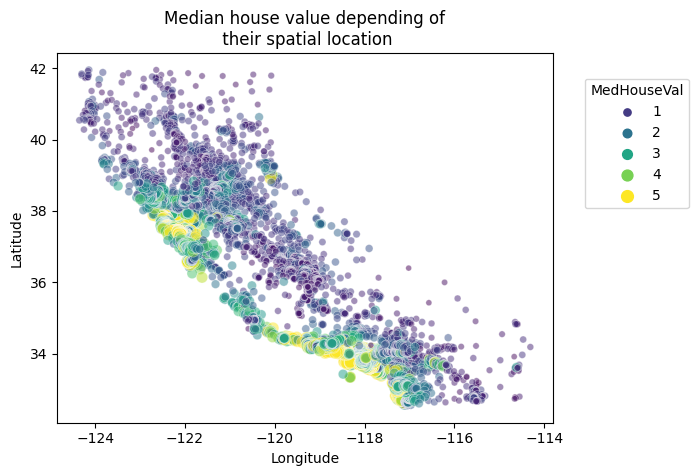

In [11]:
sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

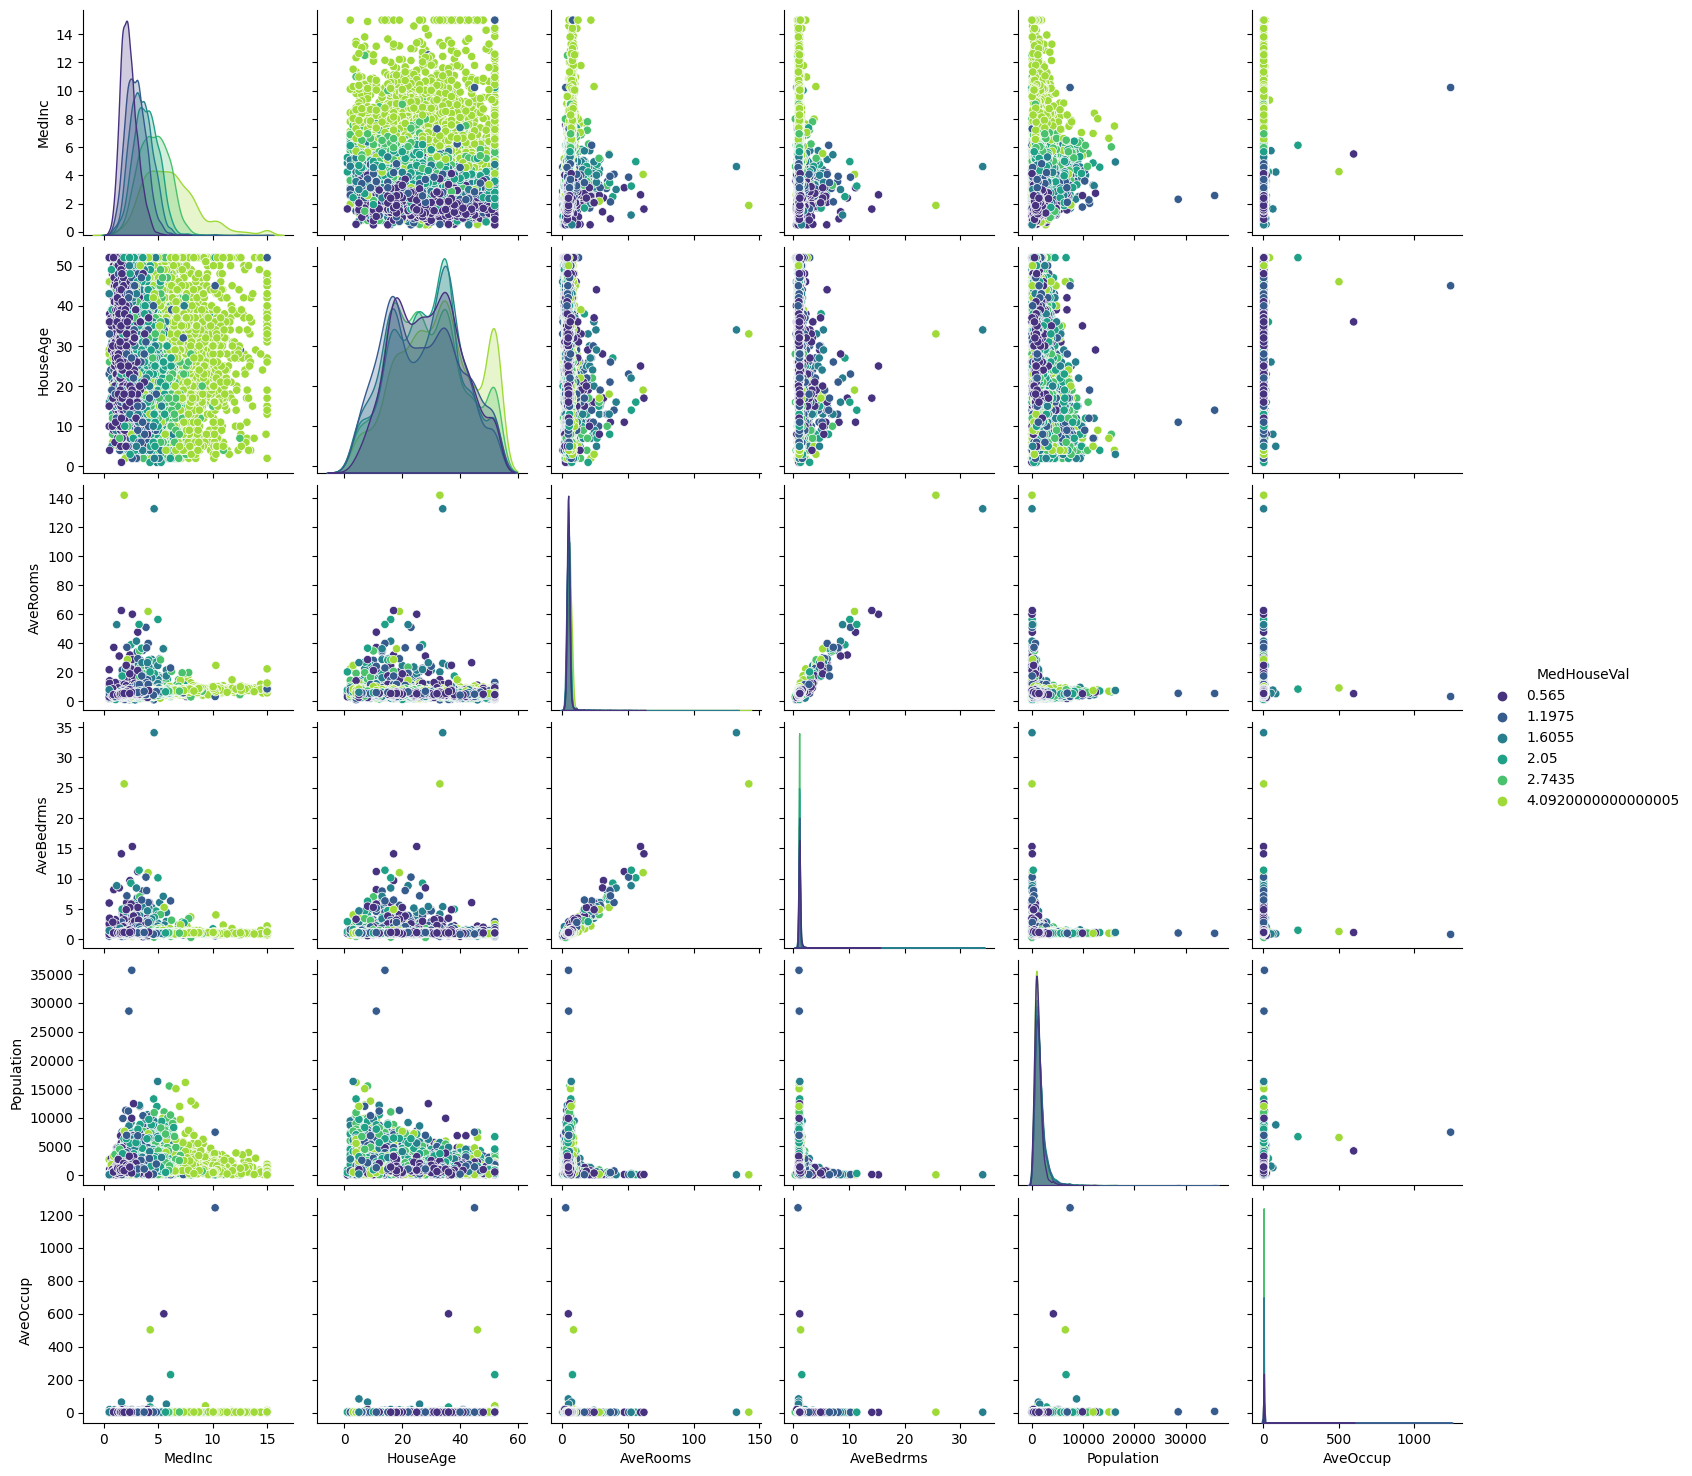

In [12]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

<Axes: >

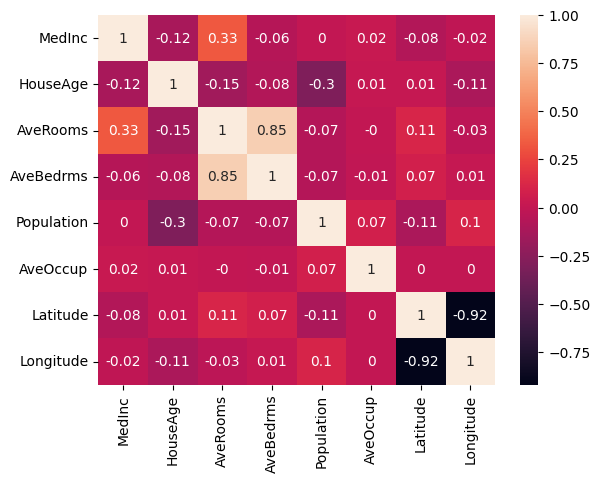

In [13]:
#Created a dataframe without the MedHouseVal, since we need to see the correlation between the variables
california_1 = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)

correlation_matrix = california_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<Axes: >

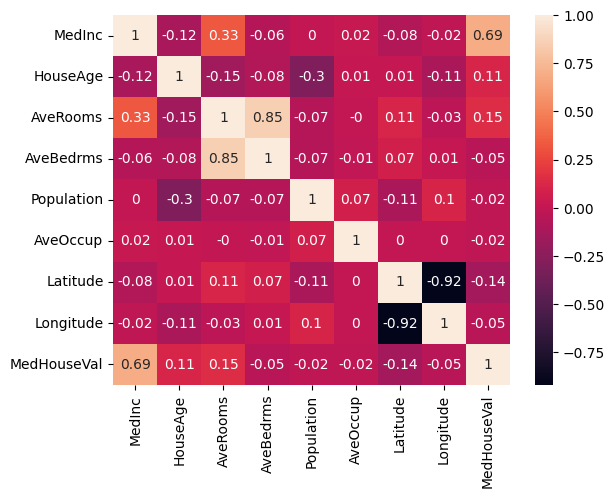

In [14]:
#Created a dataframe with the MedHouseVal

sns.heatmap(data=california_housing.frame.corr().round(2), annot=True)

**Notice**

1.   By looking at the correlation matrix we can see that **MedHouseVal** has a positive correlation with **MedInc** (0.69).

2. An important point in selecting features for a linear regression model is to
check for multicolinearity. The feature **LATITUDE** has a strong negative correlation with **LONGITUDE** (-0.92). These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features **AveRooms**, **AveBedrms** has a strong positive correlation with (0.85).



But for now we will keep all the features.

**Training and testing the model**
Here we use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets. and check the model performance on the train dataset.

In [15]:
X_total = california_housing.data
y_price = california_housing.target



y_price = np.array(y_price).reshape(-1,1)

print(X_total.shape)
print(y_price.shape)

(20640, 8)
(20640, 1)


**Splitting the data into training and testing sets**
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. *We do this to assess the model’s performance on unseen data*. To split the data we use *train_test_split* function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.



In [16]:
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(X_total, y_price, test_size = 0.2, shuffle=True, random_state=5)

print(X_train_t.shape)
print(X_test_t.shape)
print(Y_train_t.shape)
print(Y_test_t.shape)

(16512, 8)
(4128, 8)
(16512, 1)
(4128, 1)


In [17]:
print(X_train_t)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5500   3.7250      35.0  3.443320   0.975709      1428.0  2.890688     33.99   
15860  4.5057      52.0  4.865546   0.983193      1047.0  2.199580     37.76   
7232   2.1250      36.0  3.464789   0.968310      1024.0  3.605634     34.02   
6115   2.6629      33.0  4.952909   1.263158      1787.0  4.950139     34.12   
8828   2.5812      36.0  2.970085   0.978632       874.0  1.867521     34.09   
...       ...       ...       ...        ...         ...       ...       ...   
5520   6.5778      46.0  6.561194   1.050746       839.0  2.504478     33.97   
3046   2.4044      34.0  5.478632   1.079772      1101.0  3.136752     35.50   
20463  5.8096      20.0  8.165888   1.049065      1629.0  3.806075     34.27   
18638  3.5943      14.0  5.001474   1.071481      3416.0  2.517318     36.99   
2915   4.3482       9.0  5.792453   1.103774       409.0  1.929245     35.36   

       Longitude  
5500     -118.42  
1